### EDA

--- Starting Condensed EDA for Problem A (Class Attendance - problem2.csv) ---
Loaded ./data/problem2.csv. Shape: (1500, 8)

Missing Values (Problem A):
booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

Cleaning 'days_before' column...

Attendance Rate (Problem A): 30.27%


/var/folders/v7/pz5_q5x958gblydndglhwrw00000gp/T/ipykernel_90458/3653545284.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_A['days_before'].fillna(df_A['days_before'].median(), inplace=True)
/var/folders/v7/pz5_q5x958gblydndglhwrw00000gp/T/ipykernel_90458/3653545284.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

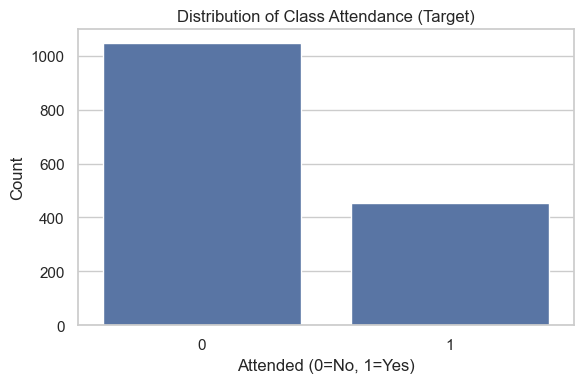


Analyzing Key Features vs. Attendance (Problem A)...


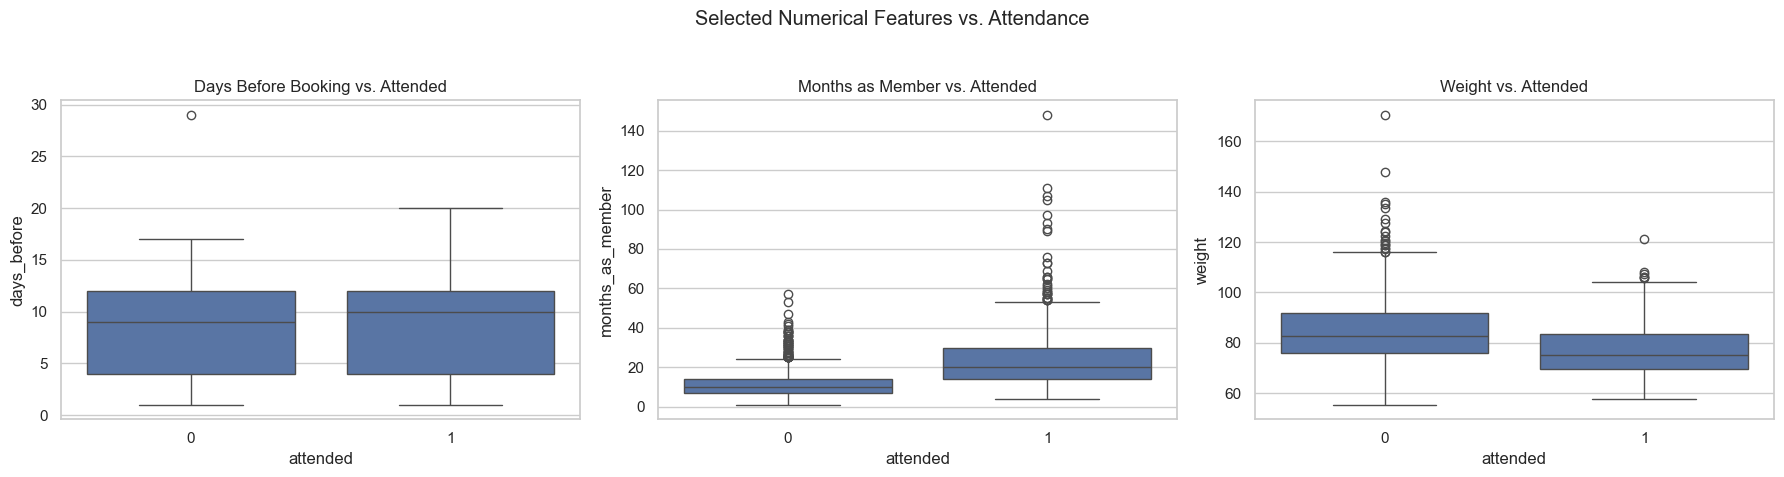

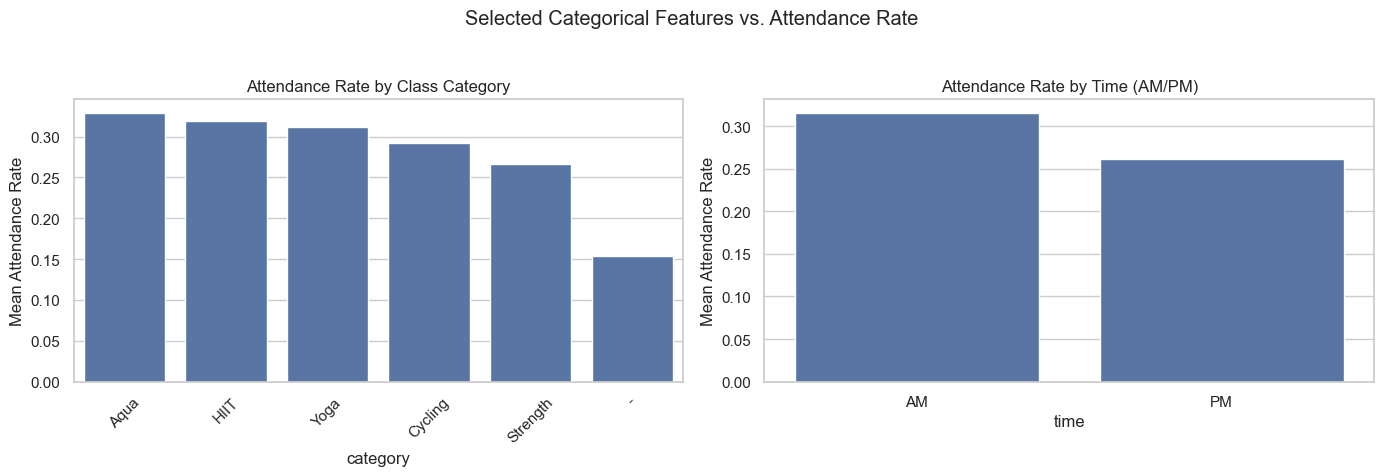



--- Starting Condensed EDA for Problem B (Gym Crowdedness - problem1.csv) ---
Loaded ./data/problem1.csv. Shape: (62184, 11)

Missing Values (Problem B):
number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64


/var/folders/v7/pz5_q5x958gblydndglhwrw00000gp/T/ipykernel_90458/3653545284.py:94: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_B['date'] = pd.to_datetime(df_B['date'])



Target Statistics (Problem B):
count    62184.000000
mean        29.072543
std         22.689026
min          0.000000
25%          9.000000
50%         28.000000
75%         43.000000
max        145.000000
Name: number_people, dtype: float64


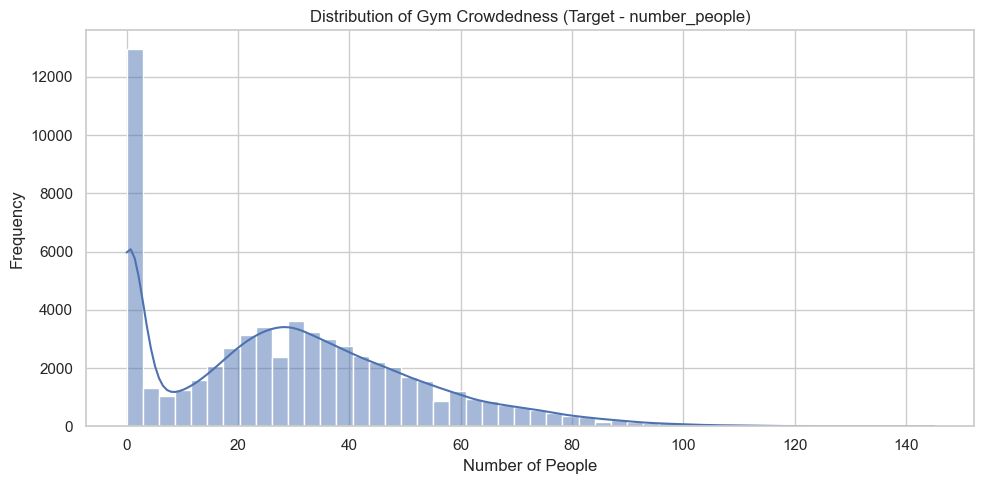


Analyzing Key Features vs. Crowdedness (Problem B)...


/var/folders/v7/pz5_q5x958gblydndglhwrw00000gp/T/ipykernel_90458/3653545284.py:124: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


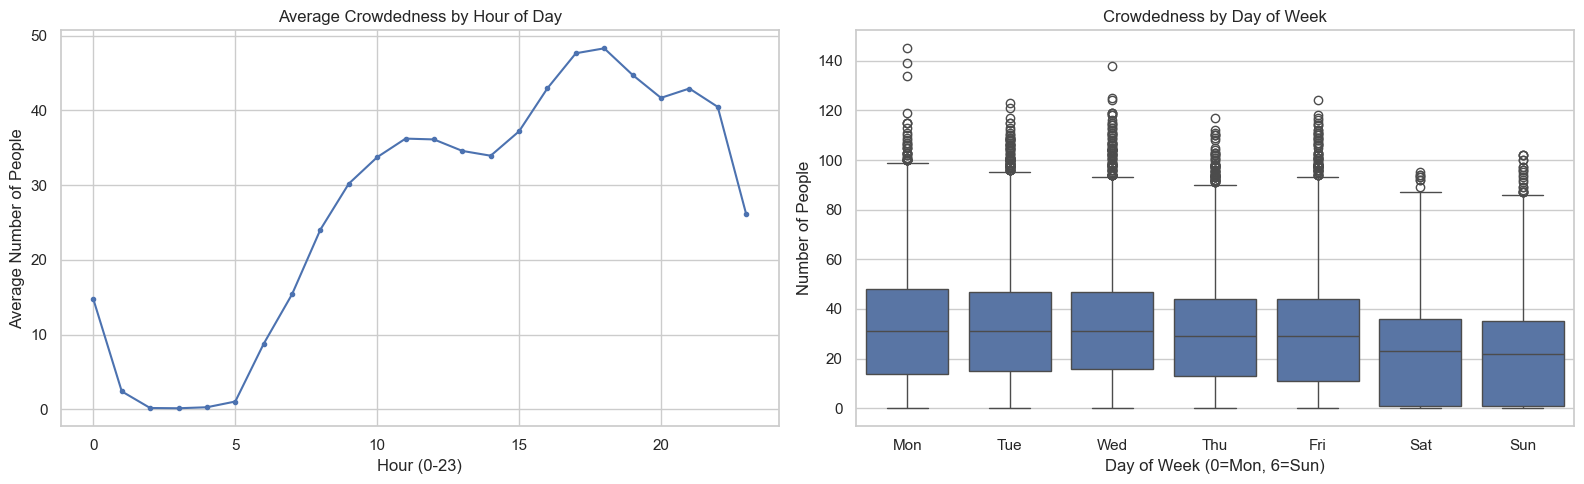

/var/folders/v7/pz5_q5x958gblydndglhwrw00000gp/T/ipykernel_90458/3653545284.py:140: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No', 'Yes'])


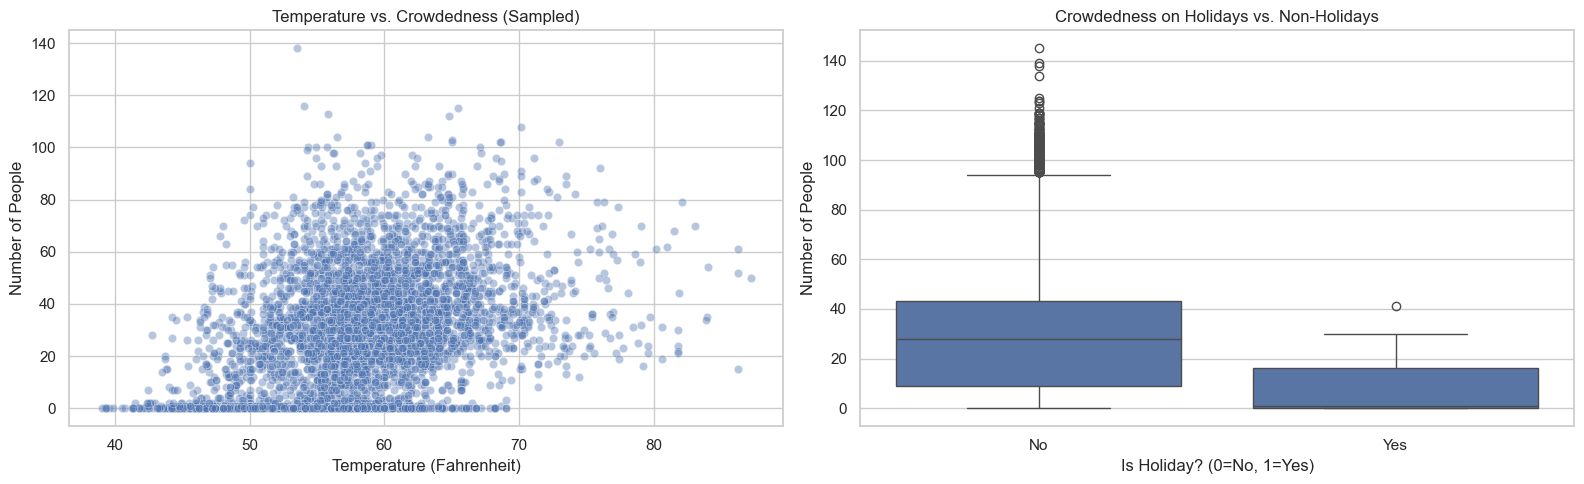

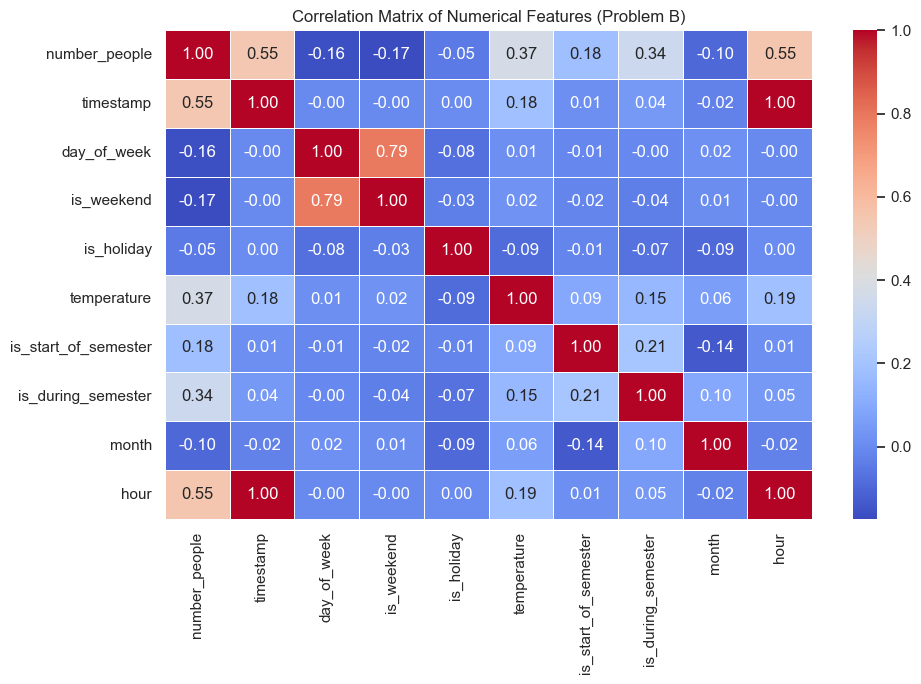



--- Condensed EDA Complete ---


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re # For cleaning 'days_before'

# Set plot style
sns.set(style="whitegrid")

# --- Condensed EDA for Problem A: Class Attendance Prediction (problem2.csv) ---
print("--- Starting Condensed EDA for Problem A (Class Attendance - problem2.csv) ---")

# 1. Load Data & Basic Checks
data_path_A = './data/problem2.csv'
try:
    df_A = pd.read_csv(data_path_A)
    print(f"Loaded {data_path_A}. Shape: {df_A.shape}")
    print("\nMissing Values (Problem A):")
    print(df_A.isnull().sum())
    # print(df_A.info()) # Can uncomment for detailed types if needed
except FileNotFoundError:
    print(f"Error: {data_path_A} not found.")
    exit()

# 2. Essential Cleaning ('days_before')
def extract_days(value):
    if isinstance(value, str):
        match = re.search(r'\d+', value)
        if match: return int(match.group(0))
    elif pd.isna(value): return np.nan
    elif isinstance(value, (int, float)): return int(value)
    return np.nan
print("\nCleaning 'days_before' column...")
df_A['days_before'] = df_A['days_before'].apply(extract_days)
df_A['days_before'] = pd.to_numeric(df_A['days_before'], errors='coerce')
# Simple imputation for plotting - replace with pipeline later
df_A['days_before'].fillna(df_A['days_before'].median(), inplace=True)
df_A['weight'].fillna(df_A['weight'].median(), inplace=True) # Impute weight too if needed for plots

# 3. Target Variable Distribution (Crucial for Classification)
plt.figure(figsize=(6, 4))
sns.countplot(x='attended', data=df_A)
plt.title('Distribution of Class Attendance (Target)')
plt.xlabel('Attended (0=No, 1=Yes)')
plt.ylabel('Count')
print(f"\nAttendance Rate (Problem A): {df_A['attended'].mean():.2%}")
plt.tight_layout()
plt.show()

# 4. Key Feature vs. Target Analysis (Problem A)
print("\nAnalyzing Key Features vs. Attendance (Problem A)...")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Selected Numerical Features vs. Attendance')
# Compare a few potentially interesting numerical features
sns.boxplot(x='attended', y='days_before', data=df_A, ax=axes[0])
axes[0].set_title('Days Before Booking vs. Attended')
sns.boxplot(x='attended', y='months_as_member', data=df_A, ax=axes[1])
axes[1].set_title('Months as Member vs. Attended')
sns.boxplot(x='attended', y='weight', data=df_A, ax=axes[2])
axes[2].set_title('Weight vs. Attended')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Selected Categorical Features vs. Attendance Rate')
# Compare a few potentially interesting categorical features
attendance_rate_cat = df_A.groupby('category')['attended'].mean().reset_index().sort_values('attended', ascending=False)
sns.barplot(x='category', y='attended', data=attendance_rate_cat, ax=axes[0])
axes[0].set_title('Attendance Rate by Class Category')
axes[0].set_ylabel('Mean Attendance Rate')
axes[0].tick_params(axis='x', rotation=45)

attendance_rate_time = df_A.groupby('time')['attended'].mean().reset_index()
sns.barplot(x='time', y='attended', data=attendance_rate_time, ax=axes[1])
axes[1].set_title('Attendance Rate by Time (AM/PM)')
axes[1].set_ylabel('Mean Attendance Rate')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- Condensed EDA for Problem B: Gym Crowdedness Prediction (problem1.csv) ---
print("\n\n--- Starting Condensed EDA for Problem B (Gym Crowdedness - problem1.csv) ---")

# 1. Load Data & Basic Checks
data_path_B = './data/problem1.csv'
try:
    df_B = pd.read_csv(data_path_B)
    print(f"Loaded {data_path_B}. Shape: {df_B.shape}")
    print("\nMissing Values (Problem B):")
    print(df_B.isnull().sum())
    # print(df_B.info()) # Can uncomment if needed
    # Convert 'date' to datetime
    df_B['date'] = pd.to_datetime(df_B['date'])
except FileNotFoundError:
    print(f"Error: {data_path_B} not found.")
    exit()

# 2. Target Variable Distribution (Crucial for Regression)
plt.figure(figsize=(10, 5))
sns.histplot(df_B['number_people'], kde=True, bins=50)
plt.title('Distribution of Gym Crowdedness (Target - number_people)')
plt.xlabel('Number of People')
plt.ylabel('Frequency')
print(f"\nTarget Statistics (Problem B):\n{df_B['number_people'].describe()}")
plt.tight_layout()
plt.show()

# 3. Key Feature vs. Target Analysis (Problem B)
print("\nAnalyzing Key Features vs. Crowdedness (Problem B)...")

# Time is usually dominant - explore Hour and Day of Week
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
df_B.groupby('hour')['number_people'].mean().plot(kind='line', marker='.', ax=axes[0])
axes[0].set_title('Average Crowdedness by Hour of Day')
axes[0].set_xlabel('Hour (0-23)')
axes[0].set_ylabel('Average Number of People')
axes[0].grid(True)

sns.boxplot(x='day_of_week', y='number_people', data=df_B, ax=axes[1])
axes[1].set_title('Crowdedness by Day of Week')
axes[1].set_xlabel('Day of Week (0=Mon, 6=Sun)')
axes[1].set_ylabel('Number of People')
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()

# Explore Temperature and a flag like Holiday
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.scatterplot(x='temperature', y='number_people', data=df_B.sample(5000), alpha=0.4, ax=axes[0])
axes[0].set_title('Temperature vs. Crowdedness (Sampled)')
axes[0].set_xlabel('Temperature (Fahrenheit)')
axes[0].set_ylabel('Number of People')

sns.boxplot(x='is_holiday', y='number_people', data=df_B, ax=axes[1])
axes[1].set_title('Crowdedness on Holidays vs. Non-Holidays')
axes[1].set_xlabel('Is Holiday? (0=No, 1=Yes)')
axes[1].set_ylabel('Number of People')
axes[1].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()


# 4. Correlation Matrix (Quick overview for Regression)
plt.figure(figsize=(10, 7))
# Select only numeric columns for standard correlation
numerical_cols_B = df_B.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df_B[numerical_cols_B].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features (Problem B)')
plt.tight_layout()
plt.show()


print("\n\n--- Condensed EDA Complete ---")

### problem A
- The number of days a class is booked in advance shows little difference between attendees and non-attendees, suggesting booking lead time isn't a strong predictor on its own.

- Members who attend (attended = 1) tend to have been members for significantly longer periods and may have a slightly lower average weight compared to those who do not attend.

- Class category is a relevant factor, with Aqua, HIIT, and Yoga having the highest mean attendance rates, while Strength and Cycling are slightly lower, and uncategorized (-) classes have the lowest rate.

- The time of day also appears important, as AM classes show a noticeably higher average attendance rate than PM classes.

### problem B
- Gym crowdedness (number_people) shows a moderate positive linear correlation with the time of day (timestamp and hour at 0.55).

- There are weaker positive correlations with temperature (0.37) and whether it's during a semester (is_during_semester, 0.34).

- Factors like day of the week, weekend status, and holidays exhibit only weak or negligible linear correlations with the number of people.

- Significant redundancy is evident, particularly the perfect correlation between timestamp and hour (1.00), and the strong correlation between day_of_week and is_weekend (0.79).

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import re # Import regular expressions module

# --- Problem A: Optimizing Group Fitness Class Utilization (Classification) ---
# --- USES data from ./data/problem2.csv BASED ON PROVIDED COLUMN NAMES ---

print("--- Starting Problem A: Class Attendance Prediction (using ./data/problem2.csv) ---")

# 1. Load Data for Problem A (Classification)
data_path_A = './data/problem2.csv' # Updated path
try:
    df_problem_A = pd.read_csv(data_path_A)
    print(f"Problem A data ({data_path_A}) loaded successfully.")
except FileNotFoundError:
    print(f"Error: {data_path_A} not found. Please ensure the 'data' folder exists and contains the file.")
    exit()

# ****** START OF CLEANING STEP ******
# Clean the 'days_before' column: Extract number from string like 'X days'
def extract_days(value):
    if isinstance(value, str):
        match = re.search(r'\d+', value) # Find one or more digits
        if match:
            return int(match.group(0))
    elif pd.isna(value):
         return np.nan # Keep NaN as NaN for imputer
    elif isinstance(value, (int, float)):
         return int(value) # Keep existing numbers as numbers
    return np.nan # Return NaN if format is unexpected

print("Cleaning 'days_before' column...")
try:
    df_problem_A['days_before'] = df_problem_A['days_before'].apply(extract_days)
    df_problem_A['days_before'] = pd.to_numeric(df_problem_A['days_before'], errors='coerce')
    print("'days_before' column cleaned and converted to numeric.")
except Exception as e:
    print(f"Error cleaning 'days_before': {e}. Please check the column format.")
    exit()
# ****** END OF CLEANING STEP ******

# 2. Define Features (X) and Target (y) for Problem A
y_class = df_problem_A['attended']
X_class = df_problem_A.drop(['attended', 'booking_id'], axis=1)

# 3. Identify Feature Types for Problem A
numerical_features_class = ['months_as_member', 'weight', 'days_before']
categorical_features_class = ['day_of_week', 'time', 'category']

# 4. Preprocessing Steps for Problem A
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_class = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features_class),
        ('cat', categorical_transformer, categorical_features_class)
    ],
    remainder='passthrough'
)

# 5. Split Data into Training and Testing Sets for Problem A
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)
print(f"Data split complete for Problem A: Train set size={len(X_train_class)}, Test set size={len(X_test_class)}")

# 6. Define and Train Models for Problem A (using Pipelines)
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor_class),
                              ('classifier', LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000))]) # Increased max_iter

pipeline_rf_class = Pipeline(steps=[('preprocessor', preprocessor_class),
                                   ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))])

print("\nTraining Logistic Regression (Problem A)...")
pipeline_lr.fit(X_train_class, y_train_class)
print("Training Random Forest Classifier (Problem A)...")
pipeline_rf_class.fit(X_train_class, y_train_class)
print("Model training complete for Problem A.")

# 7. Evaluate Models for Problem A
print("\n--- Evaluating Classification Models (Problem A) ---")

# Logistic Regression Evaluation
y_pred_lr = pipeline_lr.predict(X_test_class)
y_prob_lr = pipeline_lr.predict_proba(X_test_class)[:, 1]
print("\nLogistic Regression Performance (Problem A):")
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_lr):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_class, y_prob_lr):.4f}")
print("Classification Report:\n", classification_report(y_test_class, y_pred_lr))

# Random Forest Classifier Evaluation
y_pred_rf_class = pipeline_rf_class.predict(X_test_class)
y_prob_rf_class = pipeline_rf_class.predict_proba(X_test_class)[:, 1]
print("\nRandom Forest Classifier Performance (Problem A):")
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_rf_class):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_class, y_prob_rf_class):.4f}")
print("Classification Report:\n", classification_report(y_test_class, y_pred_rf_class))


# --- Problem B: Optimizing Gym Equipment Utilization (Regression) ---
# --- USES data from ./data/problem1.csv BASED ON PROVIDED COLUMN NAMES ---

print("\n\n--- Starting Problem B: Gym Crowdedness Prediction (using ./data/problem1.csv) ---")

# 1. Load Data for Problem B (Regression)
data_path_B = './data/problem1.csv' # Updated path
try:
    df_problem_B = pd.read_csv(data_path_B)
    print(f"Problem B data ({data_path_B}) loaded successfully.")
    # Convert 'date' column to datetime objects
    df_problem_B['date'] = pd.to_datetime(df_problem_B['date'])
except FileNotFoundError:
    print(f"Error: {data_path_B} not found. Please ensure the 'data' folder exists and contains the file.")
    exit()

# 2. Define Features (X) and Target (y) for Problem B
y_reg = df_problem_B['number_people']
X_reg = df_problem_B.drop(['number_people', 'date'], axis=1)

# 3. Identify Feature Types for Problem B
numerical_features_reg = ['timestamp', 'temperature', 'month', 'hour']
categorical_features_reg = ['day_of_week', 'is_weekend', 'is_holiday', 'is_start_of_semester', 'is_during_semester']

# 4. Preprocessing Steps for Problem B
numerical_transformer_reg = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer_reg = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_reg = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_reg, numerical_features_reg),
        ('cat', categorical_transformer_reg, categorical_features_reg)
    ],
    remainder='passthrough'
)

# 5. Split Data for Problem B
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)
print(f"Data split complete for Problem B: Train set size={len(X_train_reg)}, Test set size={len(X_test_reg)}")

# 6. Define and Train Models for Problem B

# Model 1: Linear Regression (Baseline)
pipeline_linr = Pipeline(steps=[('preprocessor', preprocessor_reg),
                                ('regressor', LinearRegression())])

# Model 2: Random Forest Regressor
pipeline_rf_reg = Pipeline(steps=[('preprocessor', preprocessor_reg),
                                  ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))])

print("\nTraining Linear Regression (Problem B)...")
pipeline_linr.fit(X_train_reg, y_train_reg)
print("Training Random Forest Regressor (Problem B)...")
pipeline_rf_reg.fit(X_train_reg, y_train_reg)
print("Model training complete for Problem B.")

# 7. Evaluate Models for Problem B
print("\n--- Evaluating Regression Models (Problem B) ---")

# Linear Regression Evaluation
y_pred_linr = pipeline_linr.predict(X_test_reg)
rmse_linr = np.sqrt(mean_squared_error(y_test_reg, y_pred_linr))
r2_linr = r2_score(y_test_reg, y_pred_linr)
print("\nLinear Regression Performance (Problem B):")
print(f"RMSE (Root Mean Squared Error): {rmse_linr:.4f}")
print(f"R^2 Score: {r2_linr:.4f}")

# Random Forest Regressor Evaluation
y_pred_rf_reg = pipeline_rf_reg.predict(X_test_reg)
rmse_rf_reg = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf_reg))
r2_rf_reg = r2_score(y_test_reg, y_pred_rf_reg)
print("\nRandom Forest Regressor Performance (Problem B):")
print(f"RMSE (Root Mean Squared Error): {rmse_rf_reg:.4f}")
print(f"R^2 Score: {r2_rf_reg:.4f}")

# 8. Feature Importance (Example for Random Forest Regressor - Problem B)
print("\n--- Feature Importance Analysis (Problem B - Random Forest Regressor) ---")
preprocessor_fitted_reg = pipeline_rf_reg.named_steps['preprocessor']
rf_model_reg = pipeline_rf_reg.named_steps['regressor']

try:
    ohe_feature_names = preprocessor_fitted_reg.named_steps['cat']\
        .named_steps['onehot'].get_feature_names_out(categorical_features_reg)
    all_feature_names = numerical_features_reg + ohe_feature_names.tolist()
    importances = rf_model_reg.feature_importances_

    if len(all_feature_names) == len(importances):
        feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        print("Top 10 Features influencing gym crowdedness prediction (Problem B):")
        print(feature_importance_df.head(10))
    else:
        print(f"Mismatch in feature names ({len(all_feature_names)}) and importances ({len(importances)}). Cannot display feature importance mapping.")
        print("Raw Importances:", importances)
except Exception as e:
    print(f"Could not extract feature importances automatically: {e}")
    print("Feature importances are available in rf_model_reg.feature_importances_ but matching names requires care.")

print("\n\n--- Analysis Complete ---")
print("Next steps would involve deeper EDA, feature engineering, hyperparameter tuning, model selection, and crucial ethical considerations review.")

--- Starting Problem A: Class Attendance Prediction (using ./data/problem2.csv) ---
Problem A data (./data/problem2.csv) loaded successfully.
Cleaning 'days_before' column...
'days_before' column cleaned and converted to numeric.
Data split complete for Problem A: Train set size=1200, Test set size=300

Training Logistic Regression (Problem A)...
Training Random Forest Classifier (Problem A)...
Model training complete for Problem A.

--- Evaluating Classification Models (Problem A) ---

Logistic Regression Performance (Problem A):
Accuracy: 0.7733
ROC AUC: 0.8288
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       209
           1       0.61      0.73      0.66        91

    accuracy                           0.77       300
   macro avg       0.74      0.76      0.75       300
weighted avg       0.79      0.77      0.78       300


Random Forest Classifier Performance (Problem A):
Accuracy: 0.7533
ROC AUC: 0.

/var/folders/v7/pz5_q5x958gblydndglhwrw00000gp/T/ipykernel_90458/3646121268.py:128: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_problem_B['date'] = pd.to_datetime(df_problem_B['date'])


Data split complete for Problem B: Train set size=49747, Test set size=12437

Training Linear Regression (Problem B)...
Training Random Forest Regressor (Problem B)...
Model training complete for Problem B.

--- Evaluating Regression Models (Problem B) ---

Linear Regression Performance (Problem B):
RMSE (Root Mean Squared Error): 15.8244
R^2 Score: 0.5155

Random Forest Regressor Performance (Problem B):
RMSE (Root Mean Squared Error): 6.4871
R^2 Score: 0.9186

--- Feature Importance Analysis (Problem B - Random Forest Regressor) ---
Could not extract feature importances automatically: 'ColumnTransformer' object has no attribute 'named_steps'
Feature importances are available in rf_model_reg.feature_importances_ but matching names requires care.


--- Analysis Complete ---
Next steps would involve deeper EDA, feature engineering, hyperparameter tuning, model selection, and crucial ethical considerations review.
